# REGRESI

In [133]:
import numpy as np
from matplotlib import pyplot as plt

In [134]:
def inverse(x):
    A = np.copy(x)
    n = len(A)
    B = np.eye(n).astype(float)

    # Gauss-Jordan
    for i in range(n):
        # make row has leading 1 on A-side and B-side
        if A[i, i] != 1:
            factor = 1 / A[i, i]
            A[i, :] *= factor
            B[i, :] *= factor
        for j in range(n):
            # do operation for all the rows except i-th row on A-side and B-side
            if j != i:
                # find multiplier of current row by dividing it with i-th row
                multiplier = -1 * A[j, i] / A[i, i]
                # update all values of j-th row using all values of i-th row
                A[j, :] += multiplier * A[i, :]
                B[j, :] += multiplier * B[i, :]
            else:
                continue
    
    return B

### Regresi Linear

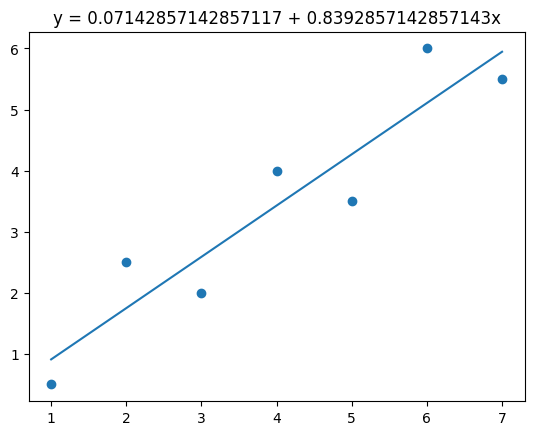

persamaan y: y = 0.07142857142857117 + 0.8392857142857143x
variansi: 2.991071428571428
standard deviasi: 0.7734431367038469


In [135]:
x = np.array([1,2,3,4,5,6,7]).astype(float)
y = np.array([0.5,2.5,2,4,3.5,6,5.5]).astype(float)

def lr(x,y,plot):
    n = len(x)
    avg_x = np.average(x)
    avg_y = np.average(y)
    sum_x = np.sum(x)
    sum_y = np.sum(y)

    xy = np.empty(n)
    xpow2 = np.empty(n)

    # x*y
    for i in range(n):
        xy[i] = x[i] * y[i]

    # x^2
    for i in range(n):
        xpow2[i] = x[i] ** 2

    sum_xy = np.sum(xy)
    sum_xpow2 = np.sum(xpow2)

    # a_1
    a_1 = (n*sum_xy - sum_x*sum_y) / (n*sum_xpow2 - sum_x**2)

    # a_0
    a_0 = avg_y - a_1*avg_x

    # error
    error = (y[:]-a_0-a_1*x[:])**2
    variance = sum(error)
    std_dev = np.sqrt(variance/(n-2))

    # output
    y_out = "y = " + str(a_0) + " + " + str(a_1) + "x"
    
    # plotting
    if plot:
        plt.title(y_out)
        plot_x = np.copy(x)
        plot_y = a_0 + a_1 * plot_x
        plt.scatter(x,y)
        plt.plot(plot_x,plot_y)
        plt.show()
    
    return y_out, variance, std_dev

out, variance, std_dev = lr(x,y,plot=True)
print("persamaan y:", out)
print("variansi:", variance)
print("standard deviasi:", std_dev)

### Multiple Linear Regression

In [136]:
x = np.array([[1,2,50],[1,8,110],[1,11,120],[1,10,550],[1,8,295],
              [1,4,200],[1,2,375],[1,2,52],[1,9,100],[1,8,300],
              [1,4,412],[1,11,400],[1,12,500],[1,2,360],[1,4,205],
              [1,4,400],[1,20,600],[1,1,585],[1,10,540],[1,15,250],
              [1,15,290],[1,16,510],[1,17,590],[1,6,100],[1,5,400]]).astype(float)
y = np.array([9.95,24.45,31.75,35,25.02,
              16.86,14.38,9.6,24.35,27.5,
              17.08,37,41.95,11.66,21.65,
              17.89,69,10.3,34.93,46.59,
              44.88,54.12,56.63,22.13,21.15]).astype(float)

def mlr(x,y,plot):
    X = np.copy(x)
    Y = np.copy(y)
    n = len(X)

    A = inverse(X.T @ X)
    B = X.T @ Y

    # beta = A^-1 @ B
    beta = A @ B

    # y_pred = X @ beta
    y_pred = X @ beta

    # output
    y_out = "y = "
    for i in range(len(beta)):
        if i == 0:
            y_out += str(beta[i]) + " + "
        elif i > 0 and i < (len(beta) - 1):
            y_out += str(beta[i]) + "x_" + str(i) + " + "
        elif i == len(beta) - 1:
            y_out += str(beta[i]) + "x_" + str(i)

    # error
    e = Y - y_pred

    # plotting
    if plot:
        None

    return y_out,e

out,e = mlr(x,y,plot=True)
print("persamaan y:",out)
print("vektor residual: \n",e)

persamaan y: y = 2.263791434404589 + 2.7442696432411853x_1 + 0.012527811385604139x_2
vektor residual: 
 [ 1.57127871 -1.14600783 -2.20409488 -1.59678413 -2.89365294  1.11356772
  1.92974001  1.19622309 -3.86499936 -0.476292   -1.3223283  -0.46188206
  0.49106715 -0.60234282  5.84092866 -0.36199456  4.33412887 -2.03683074
 -1.54150602  0.03021107 -2.18090138  1.55871047  0.32221591  2.14780957
  0.1537358 ]


### Polynomial Regression

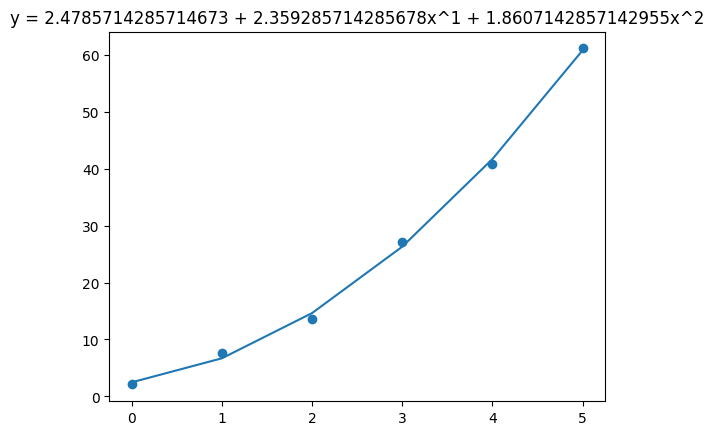

persamaan y: y = 2.4785714285714673 + 2.359285714285678x^1 + 1.8607142857142955x^2
variansi: 3.7465714285714373
standard deviasi: 1.1175227706213176


In [154]:
x = np.array([0,1,2,3,4,5]).astype(float)
y = np.array([2.1,7.7,13.6,27.2,40.9,61.1]).astype(float)

def pr(x,y,plot,poly=2):
    X = np.copy(x)
    Y = np.copy(y)
    sum_x = sum(X)
    sum_y = sum(Y)
    n = poly+1

    A = np.zeros((n,n))
    B = np.zeros(n)

    temp = []
    low = 0
    k = n
    # calculate values of temp
    for i in range(n):
        for j in range(low, k):
            if i==0 and j==0: temp.append(len(X))
            else:
                temp.append(sum(X[:]**j))
        low += 1
        k += 1
    
    # assign temp values to A 
    for i in range(len(temp)):
        if i<n:
            A[0,i]=temp[i]
        if i>=n:
            A[int(i/n),i%n]=temp[i]
    
    # calculate values of B
    for i in range(n):
        B[i] = sum(x[:]**i*y[:])

    # Ax = B -> x = A^-1 @ B
    a = inverse(A) @ B

    # output
    y_out = "y = "
    for i in range(len(a)):
        if i == 0:
            y_out += str(a[i]) + " + "
        elif i > 0 and i < (len(a) - 1):
            y_out += str(a[i]) + "x^" + str(i) + " + "
        elif i == len(a) - 1:
            y_out += str(a[i]) + "x^" + str(i)

    # error
    error = 0
    for i in range(len(X)):
        sum1 = 0
        for j in range(n):
            sum1 += a[j]*X[i]**j
        sum2 = Y[i] - sum1
        error += sum2 ** 2
    variance = error
    std_dev = np.sqrt(variance/(len(X)-n))

    # plotting
    if plot:
        plt.title(y_out)
        plot_y = []
        for i in range(len(X)):
            sum1 = 0
            for j in range(n):
                sum1 += a[j]*X[i]**j
            plot_y.append(sum1)
        plt.scatter(X,Y)
        plt.plot(X,plot_y)
        plt.show()
    
    return y_out, variance, std_dev

out, variance, std_dev = pr(x,y,plot=True)
print("persamaan y:", out)
print("variansi:", variance)
print("standard deviasi:", std_dev)